### Student Information
Name: 阮盈泓

Student ID: 112358024

GitHub ID: harryjuan75

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

# Part1-take home exercise

In [1]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [2]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42) 
#This command also shuffles the data randomly, but with random_state we can bring the same distribution of data everytime 
#if we choose the same number, in this case "42". This is good for us, it means we can reproduce the same results every time
#we want to run the code.

In [3]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [5]:
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### **>>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. .

In [6]:
X.iloc[:10, 0:5]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
9  From: libman@hsc.usc.edu (Marlena Libman) Subj...         2   

            category_name  
0           comp.graphics  
1           comp.graphics  
2  soc.religion.christian  
3  soc.religion.christian  
4  soc.religion.christian  
5  soc.religion.christian  
6  soc.religion.christian  
7                 sci.med  
8                 sci.med  
9                 sci.med

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [8]:
#Answer
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [9]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

A：the np.nan  is a special value from the NumPy library that represents the null value.<br>
B：really has missing value.<br>
C：the real data form in C and D is string, so there no missing value dected by isnull function.<br>
E：the none in 5th row is  used to define null objects and variables in python.<br>
F：there is nothing quoted by '' so the isnull function return False.<br>

### >>> Exercise 6 (take home):
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [11]:
X_sample = X.sample(n=1000)

In [15]:
X_sample

text  category  \
1069  From: pallis@server.uwindsor.ca (PALLIS  DIMIT...         1   
61    From: gifford@oasys.dt.navy.mil (Barbara Giffo...         3   
29    From: spp@zabriskie.berkeley.edu (Steve Pope) ...         2   
1709  From: dwebb@unl.edu (dale webb) Subject: Re: T...         2   
1098  From: db7n+@andrew.cmu.edu (D. Andrew Byler) S...         3   
...                                                 ...       ...   
1637  From: edm@twisto.compaq.com (Ed McCreary) Subj...         0   
1730  From: bio1@navi.up.ac.za (Fourie Joubert) Subj...         1   
357   From: jfare@53iss6.Waterloo.NCR.COM (Jim Fare)...         2   
1675  From: bobbe@vice.ICO.TEK.COM (Robert Beauchain...         0   
160   From: noring@netcom.com (Jon Noring) Subject: ...         2   

               category_name  
1069           comp.graphics  
61    soc.religion.christian  
29                   sci.med  
1709                 sci.med  
1098  soc.religion.christian  
...                      ...  
1637             alt.atheism  
1730           comp.graphics  
357                  sci.med  
1675             alt.atheism  
160                  sci.med  

[1000 rows x 3 columns]

In [13]:
X

text  category  \
0     From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4     From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
...                                                 ...       ...   
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...         2   
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...         2   
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...         2   
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2   
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2   

               category_name  
0              comp.graphics  
1              comp.graphics  
2     soc.religion.christian  
3     soc.religion.christian  
4     soc.religion.christian  
...                      ...  
2252                 sci.med  
2253                 sci.med  
2254                 sci.med  
2255                 sci.med  
2256                 sci.med  

[2257 rows x 3 columns]

ANSWER：The order of the presented data is randomized, it preserves the original indices and column structure but not the full row count.

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

![alt txt](https://i.imgur.com/9eO431H.png)

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

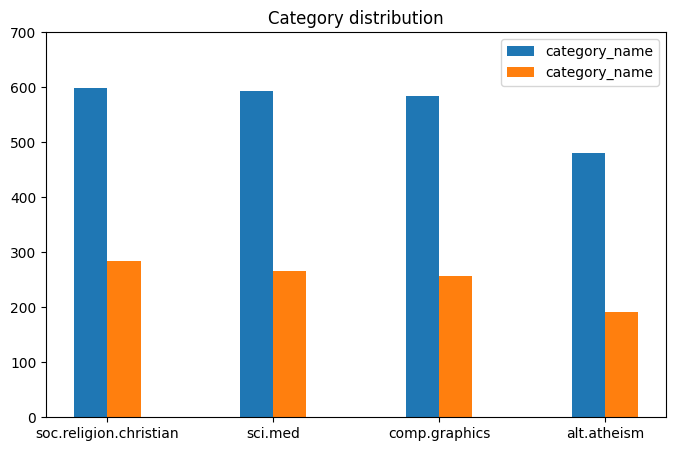

In [19]:
#Answer here
# put the oiginal data and the sampled data together

X_count = X.category_name.value_counts()
X_sample_count = X_sample.category_name.value_counts()
fig, ax = plt.subplots(figsize=(8, 5))
width = 0.2  # 條形的寬度
indices = range(len(X_count))  # X 的類別索引
upper_bound = max(X.category_name.value_counts() + 50)

ax.bar(indices,X_count, width, label='category_name')
ax.bar([i + width for i in indices], X_sample_count, width, label='category_name')

# 設定圖表標題和軸標籤
ax.set_title('Category distribution')
ax.set_xticks([i + width / 2 for i in indices])
ax.set_xticklabels(X_count.index)
ax.set_ylim(0, 700)
ax.legend(loc = 1)

# 顯示圖表
plt.show()

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix

In [29]:
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [30]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

In [35]:
# Answer here
count_vect.get_feature_names_out()[37]
# it's 01

'01'

In [37]:
# 設定目標行和列索引
row_index = 4  # 第 4 行，索引從 0 開始
col_index = 37  # 第 38 列，索引從 0 開始

# 提取矩陣中的值
value = X_counts[row_index, col_index]
print(f"第 {row_index+1} 行，第 {col_index+1} 列的值是: {value}")

# 提取該列對應的特徵名稱
feature_name = count_vect.get_feature_names_out()[col_index]
print(f"第 {col_index+1} 列的特徵名稱是: {feature_name}")

第 5 行，第 38 列的值是: 1
第 38 列的特徵名稱是: 01


### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with **FREQUENCY** of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

# Answer here
we can filter some irrelevant dimensions and delete features containing no information useful for the data mining task at hand, like using tfidf o select only terms with the highest importance or occurrence across documents or try to aggregate rows and columns to address important part
example as the flollowing

In [45]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]

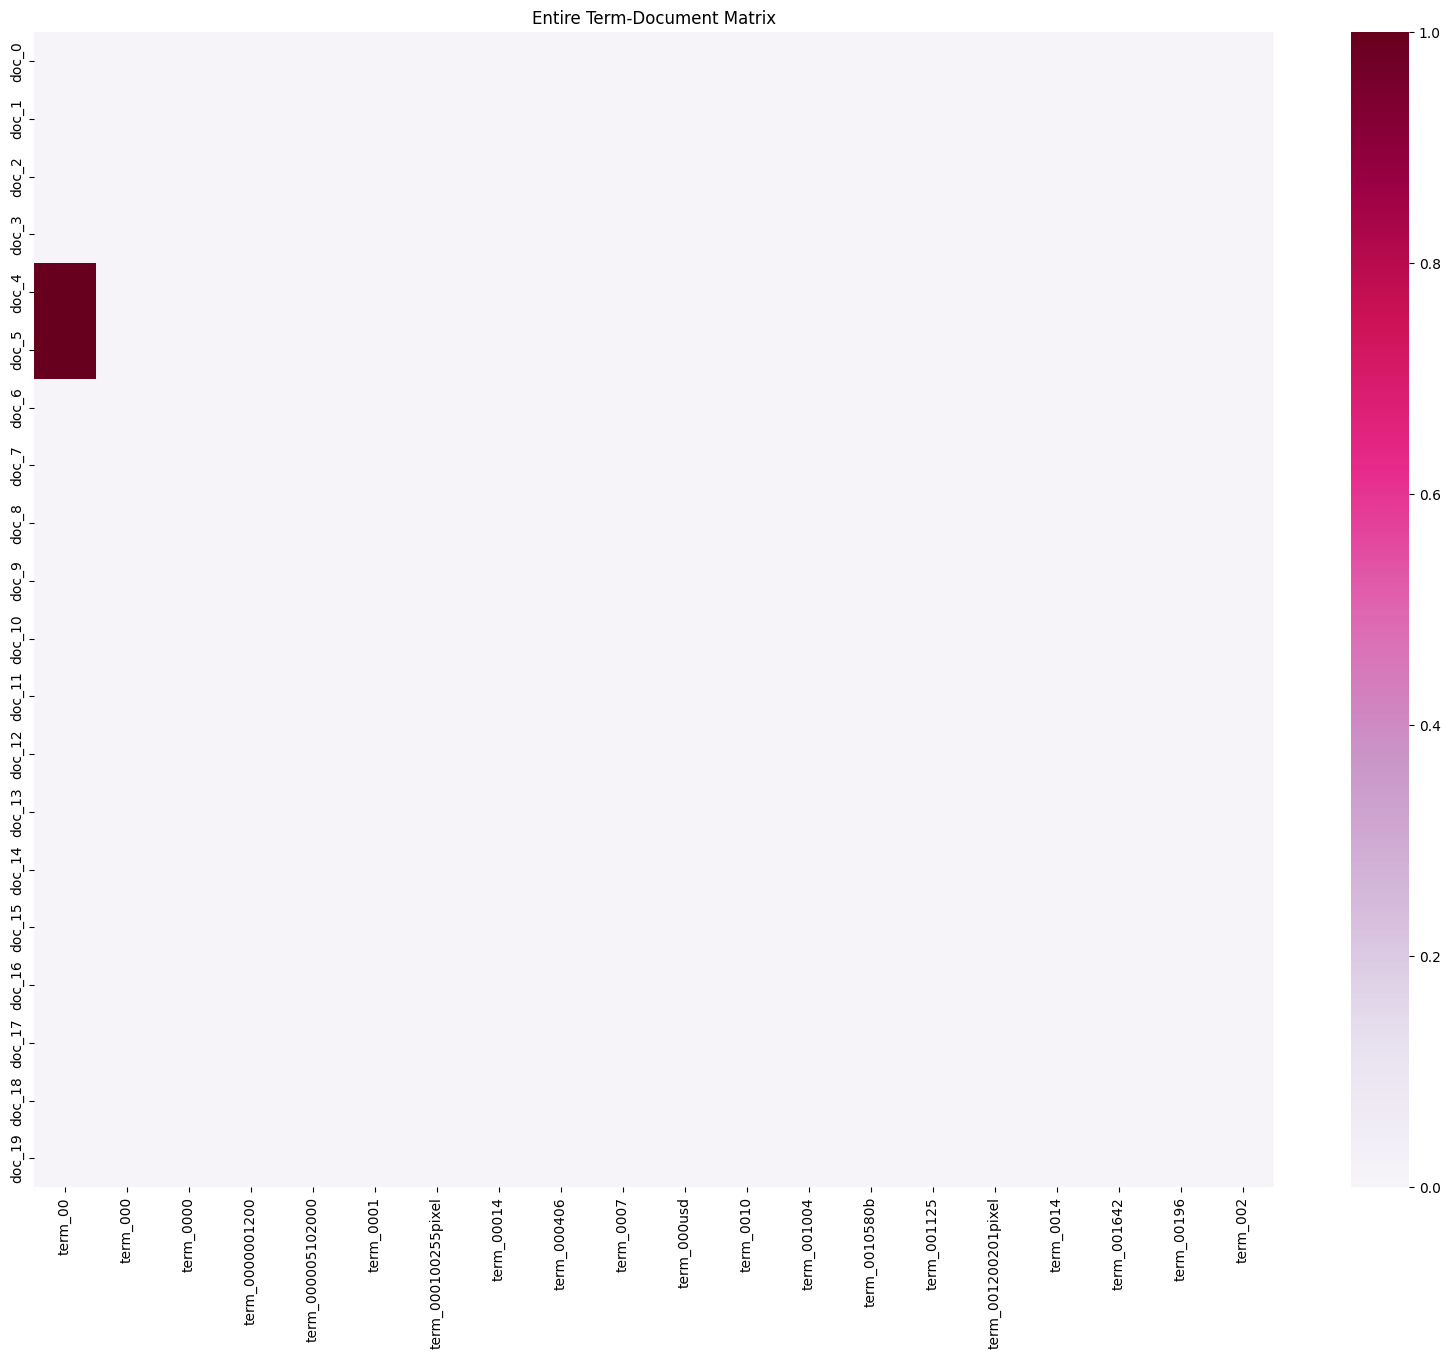

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt


df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)

plt.figure(figsize=(20, 15))  
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=False,  
                 cbar=True)  
plt.title("Entire Term-Document Matrix")
plt.show()


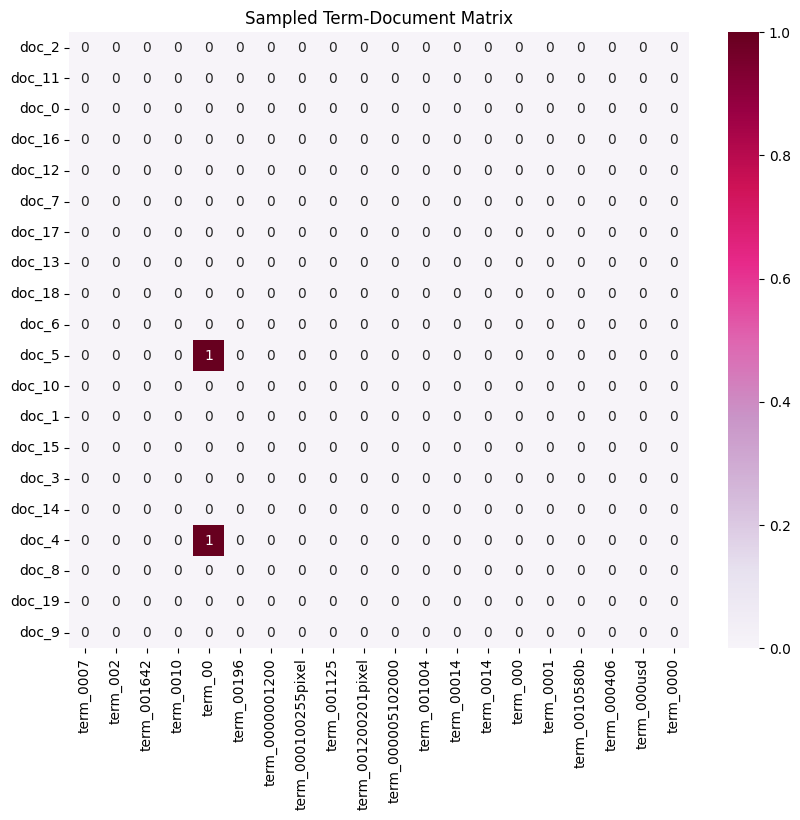

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt


sampled_rows = df_todraw.sample(n=20, axis=0)  
sampled_cols = sampled_rows.sample(n=20, axis=1) 

plt.figure(figsize=(10, 8))  
ax = sns.heatmap(sampled_cols,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True, 
                 cbar=True)  
plt.title("Sampled Term-Document Matrix")
plt.show()


### >>> **Exercise 12 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [50]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

#[3, 8, 5, 2, 5, 8, 2, 5, 3, 2]

In [57]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

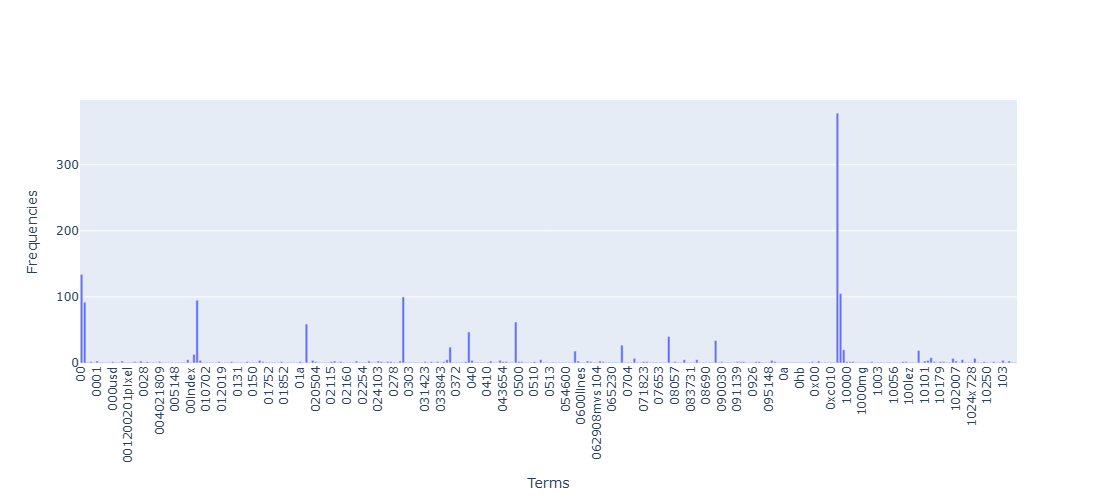

In [58]:
# Answer here
import plotly.graph_objects as go

# Assuming count_vect.get_feature_names_out() returns the feature names (x-axis labels)
# and term_frequencies contains the corresponding frequencies (y-axis values)
x_labels = count_vect.get_feature_names_out()[:300]
y_values = term_frequencies[:300]

# Create a bar chart using Plotly
fig = go.Figure(data=[
    go.Bar(x=x_labels, y=y_values)
])

# Update the layout for custom figure size and rotate x-tick labels
fig.update_layout(
    width=1000,  # Width of the figure (adjust as needed)
    height=500,  # Height of the figure (adjust as needed)
    xaxis_tickangle=-90,  # Rotate x-axis labels
    xaxis_title="Terms",
    yaxis_title="Frequencies",
    showlegend=False
)

# Show the figure
fig.show()


### >>> **Exercise 13 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


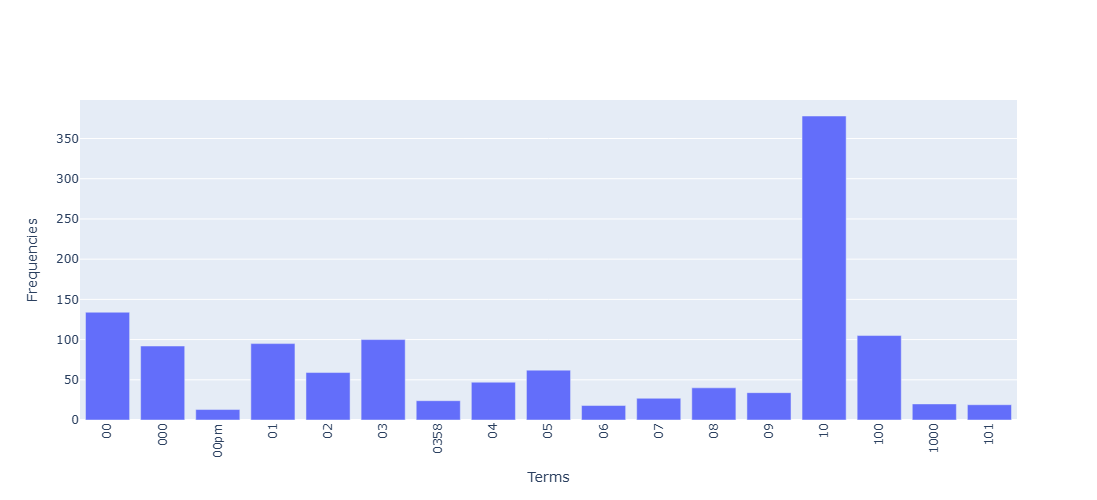

In [59]:
# Answer here
# say i want to inspect those with frequencies over 10 
import plotly.graph_objects as go
filtered_terms = [term for i, term in enumerate(count_vect.get_feature_names_out()[:300]) if term_frequencies[i] > 10]
filtered_frequencies = [freq for freq in term_frequencies[:300] if freq > 10]

fig = go.Figure(data=[
    go.Bar(x=filtered_terms, y=filtered_frequencies)
])

# Update the layout for custom figure size and rotate x-tick labels
fig.update_layout(
    width=1000,  # Adjust the width for better visibility
    height=500,  # Adjust the height for better visibility
    xaxis_tickangle=-90,  # Rotate x-axis labels for better readability
    xaxis_title="Terms",  # Title for x-axis
    yaxis_title="Frequencies",  # Title for y-axis
    showlegend=False  # Disable legend
)
fig.show()


### >>> **Exercise 14 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

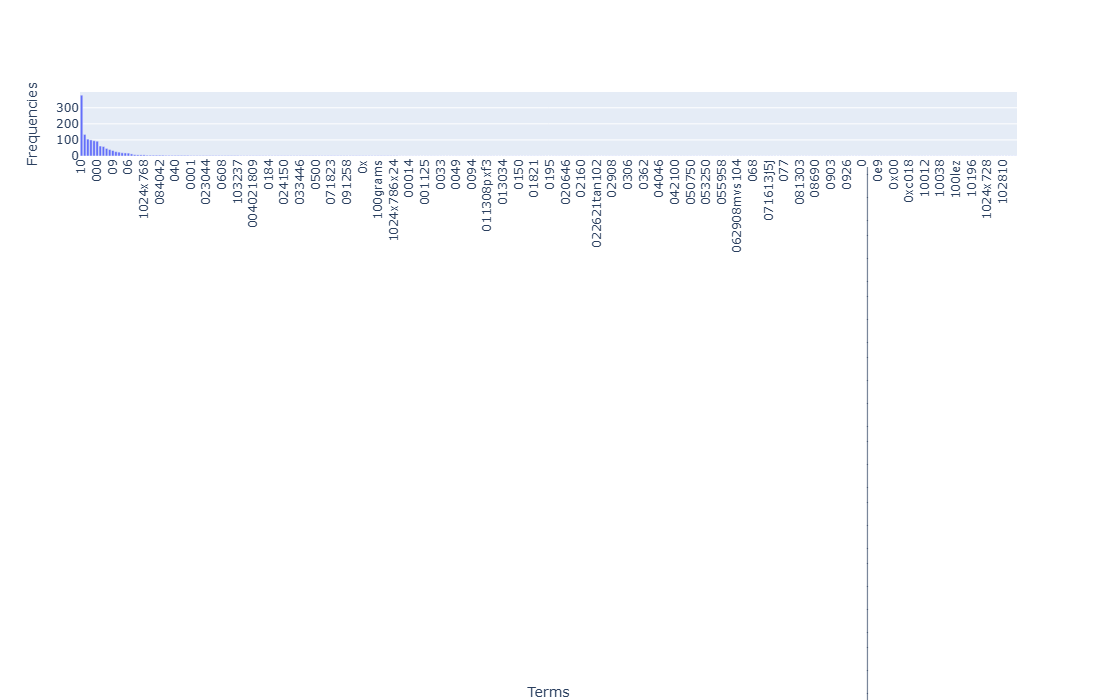

In [63]:
# Answer here
import plotly.graph_objects as go

# Get terms and their frequencies
terms = count_vect.get_feature_names_out()[:300]
frequencies = term_frequencies[:300]

# Combine terms and frequencies into a list of tuples and sort by frequency in descending order
sorted_terms_frequencies = sorted(zip(terms, frequencies), key=lambda x: x[1], reverse=True)

# Unzip the sorted list into two separate lists
sorted_terms, sorted_frequencies = zip(*sorted_terms_frequencies)

# Create a bar chart using Plotly
fig = go.Figure(data=[
    go.Bar(x=sorted_terms, y=sorted_frequencies)
])
# Update the layout for custom figure size and rotate x-tick labels
fig.update_layout(width=1400, height=700, xaxis_tickangle=-90, xaxis_title="Terms", yaxis_title="Frequencies", showlegend=False)
fig.show()


### >>> **Exercise 15 (take home):** 
You can copy the code from the previous exercise and change the 'term_frequencies' variable for the 'term_frequencies_log', comment about the differences that you observe and talk about other possible insights that we can get from a log distribution.

In [61]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

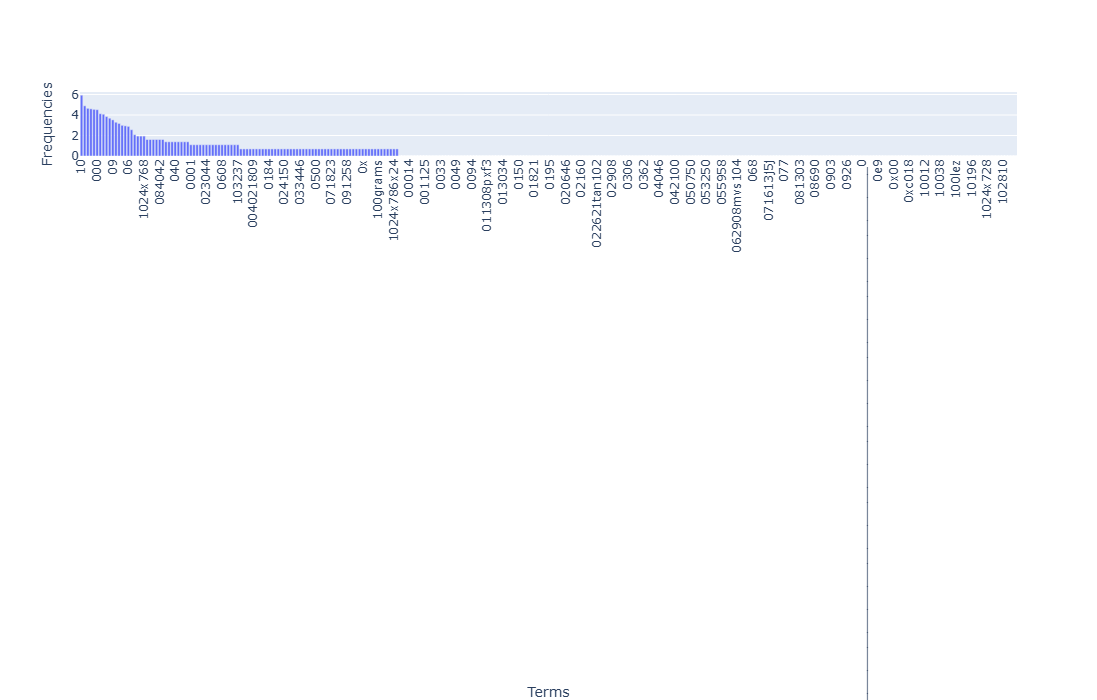

In [62]:
# Answer here
import plotly.graph_objects as go

# Get terms and their frequencies
terms = count_vect.get_feature_names_out()[:300]
frequencies = term_frequencies_log[:300]

# Combine terms and frequencies into a list of tuples and sort by frequency in descending order
sorted_terms_frequencies = sorted(zip(terms, frequencies), key=lambda x: x[1], reverse=True)

# Unzip the sorted list into two separate lists
sorted_terms, sorted_frequencies = zip(*sorted_terms_frequencies)

# Create a bar chart using Plotly
fig = go.Figure(data=[
    go.Bar(x=sorted_terms, y=sorted_frequencies)
])
# Update the layout for custom figure size and rotate x-tick labels
fig.update_layout(width=1400, height=700, xaxis_tickangle=-90, xaxis_title="Terms", yaxis_title="Frequencies", showlegend=False)
fig.show()

### >>> **Exercise 16 (take home):** 
Review the words that were filtered in each category and comment about the differences and similarities that you can see.

Answer：<br>
Even in the same category, as we change back to the same category, the filtered data change(column is different and rows stay the same) . because the filtered top5%, bottom 1% content is different every time we filter . Each time you apply the filtering process, you are recalculating the top 5% and bottom 1% of words based on the remaining words in the DataFrame. This means that the pool of words you are evaluating changes with every filter operation, which leads to different results.

### >>> **Exercise 17 (take home):** 
Implement the FAE Top-K and MaxFPGrowth algorithms from the PAMI library to analyze the 'comp.graphics' category in our processed database. **Only implement the mining part of the algorithm and display the resulting patterns**, like we did with the FPGrowth algorithm after creating the new databases. For the FAE Top-K, run trials with k values of 500, 1000, and 1500, recording the runtime for each. For MaxFPGrowth, test minimum support thresholds of 3, 6, and 9, noting the runtime for these settings as well. Compare the patterns these algorithms extract with those from the previously implemented FPGrowth algorithm. Document your findings, focusing on differences and similarities in the outputs and performance. For this you can find the following google collabs for reference provided by their github repository here: [FAE Top-K](https://colab.research.google.com/github/UdayLab/PAMI/blob/main/notebooks/frequentPattern/topk/FAE.ipynb) and [MaxFPGrowth](https://colab.research.google.com/github/UdayLab/PAMI/blob/main/notebooks/frequentPattern/maximal/MaxFPGrowth.ipynb)

ANSWER：For MaxFPGrowth, the runtime decreases as the minimum support threshold gets larger.
The runtime for FAE Top-K typically increases as 𝑘 increases because the algorithm needs to find and verify more frequent patterns.

In [76]:
# Answer Here：For MaxFPGrowth, the runtime decreases as the minimum support threshold gets larger.
#MaxFPGrowth algorithm
from PAMI.frequentPattern.maximal import MaxFPGrowth as alg
minSup=3
obj3 = alg.MaxFPGrowth(iFile='td_freq_db_comp_graphics.csv', minSup=minSup)
obj3.mine()
frequentPatternsDF_comp_graphics= obj3.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_comp_graphics))) #print the total number of patterns
print('Runtime: ' + str(obj3.getRuntime())) #measure the runtime

obj3.save('freq_patterns_comp_graphics_minSup9.txt') #save the patterns
frequentPatternsDF_comp_graphics

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 630
Runtime: 0.18407440185546875


Patterns  Support
0                                                 650         3
1    trouble expect show gmt asked plain cpu fact c...        3
2                                             spatial         3
3                                            illinois         3
4                                             chicago         3
..                                                 ...      ...
625                                       always didn         3
626                                        words long         3
627                                       words looks         3
628                                      words always         3
629                                    needs recently         3

[630 rows x 2 columns]

In [77]:
#Answer：The runtime for FAE Top-K typically increases as 𝑘 increases because the algorithm needs to find and verify more frequent patterns.
# Import the FAE Top-K algorithm
import sys
sys.path.append(r'C:\Users\HARRY JUAN\anaconda3\Lib\site-packages\PAMI\frequentPattern\topk')  # Replace with the actual path to the FAE module
import FAE as alg

# Define k value
k = 500  # Set the top-K value, similar to defining the minimum support threshold

# Create an instance of FAE Top-K algorithm with the input file and k value
obj4 = alg.FAE(iFile='td_freq_db_comp_graphics.csv', k=k)

# Mine the frequent patterns using FAE Top-K
obj4.mine()

# Convert the patterns to a DataFrame
frequentPatternsDF_comp_graphics = obj4.getPatternsAsDataFrame()

# Print the total number of patterns found
print('Total No of patterns: ' + str(len(frequentPatternsDF_comp_graphics)))

# Print the runtime
print('Runtime: ' + str(obj4.getRuntime()))

# Save the mined patterns to a text file
obj4.save('freq_patterns_comp_graphics_topk.txt')

# Display the frequent patterns DataFrame
frequentPatternsDF_comp_graphics

 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 500
Runtime: 6.788991451263428


Patterns  Support
0                                              words        9
1                                                 26        9
2                                              needs        9
3                                         displaying        8
4                                           recently        8
..                                               ...      ...
495                significance philosophical ulrich        4
496  toppoint galki suggestions philosophical ulrich        4
497         galki suggestions philosophical toppoint        4
498           galki suggestions philosophical ulrich        4
499                  suggestions philosophical galki        4

[500 rows x 2 columns]

### >>> Exercise 18 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

Database size (total no of transactions) : 131
Number of items : 5941
Minimum Transaction Size : 9
Average Transaction Size : 69.5114503816794
Maximum Transaction Size : 2039
Standard Deviation Transaction Size : 207.8621962189863
Variance in Transaction Sizes : 43539.051790957135
Sparsity : 0.9882997053725502


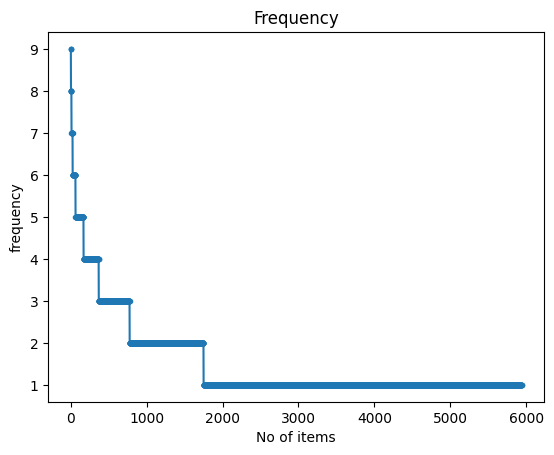

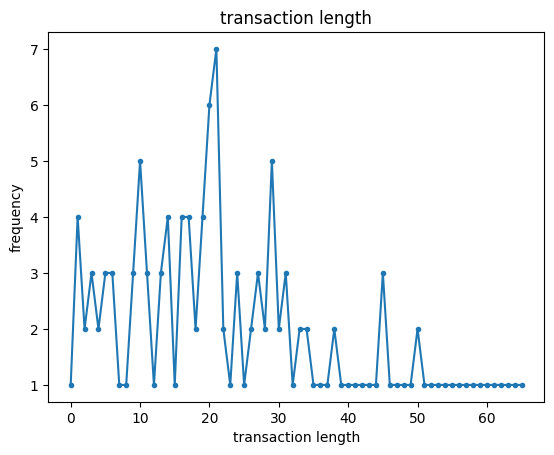

In [85]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_comp_graphics.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 594
Number of items : 15283
Minimum Transaction Size : 9
Average Transaction Size : 74.55892255892256
Maximum Transaction Size : 1070
Standard Deviation Transaction Size : 115.43440452043433
Variance in Transaction Sizes : 13347.572407606134
Sparsity : 0.9951214471923757


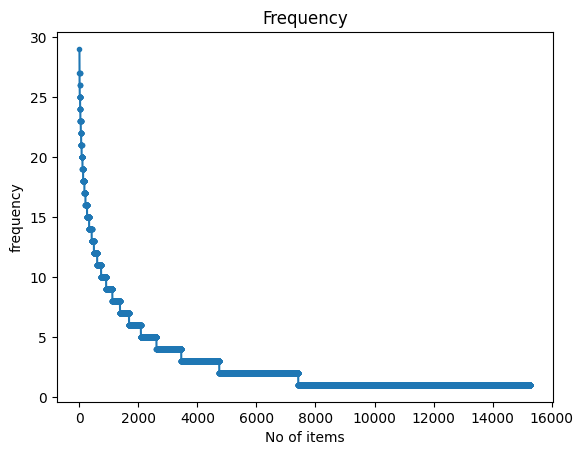

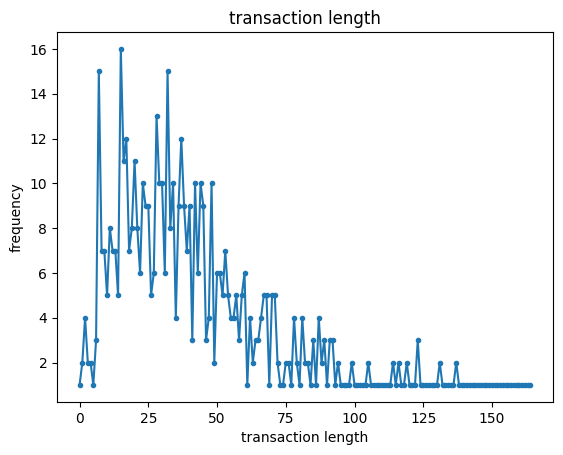

In [86]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_sci_med.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 599
Number of items : 13041
Minimum Transaction Size : 2
Average Transaction Size : 77.04507512520868
Maximum Transaction Size : 460
Standard Deviation Transaction Size : 62.384260554199
Variance in Transaction Sizes : 3898.3039849023735
Sparsity : 0.9940920884038641


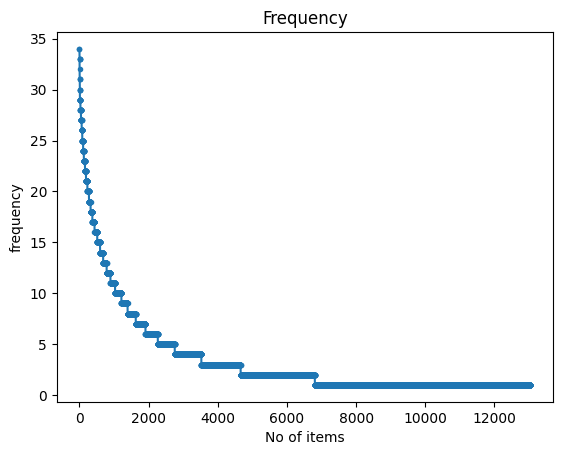

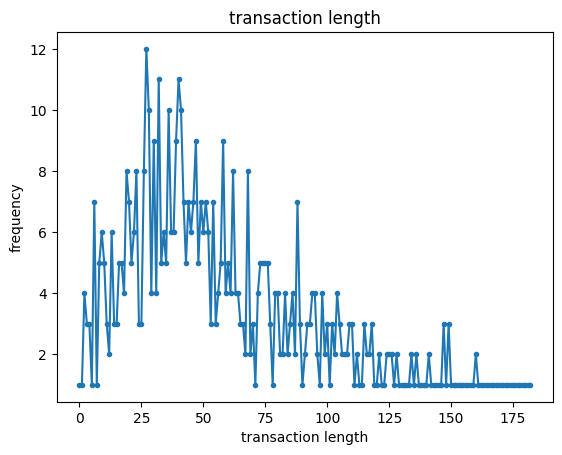

In [87]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_soc_religion_christian.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 480
Number of items : 11250
Minimum Transaction Size : 5
Average Transaction Size : 75.59791666666666
Maximum Transaction Size : 1395
Standard Deviation Transaction Size : 105.33869380396925
Variance in Transaction Sizes : 11119.405841162143
Sparsity : 0.9932801851851852


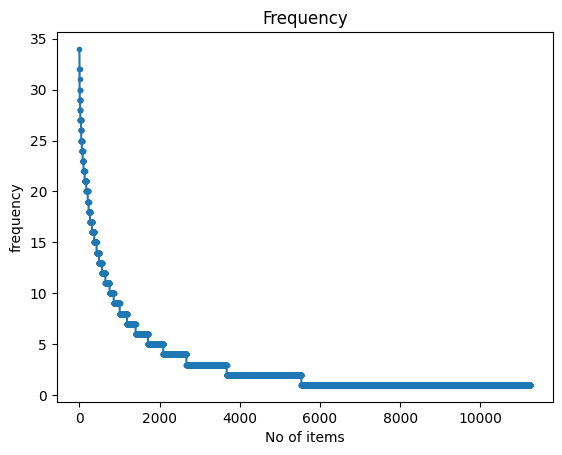

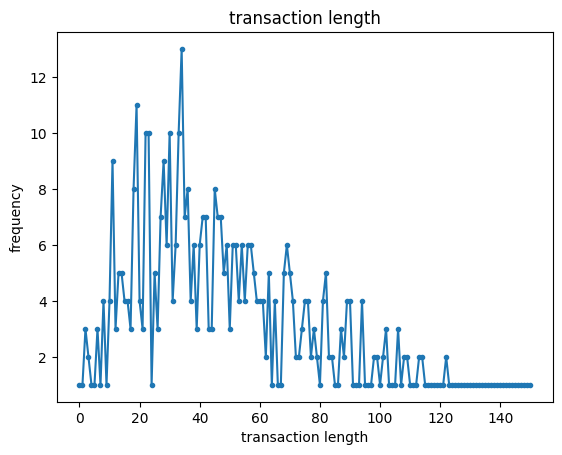

In [88]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_alt_atheism.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [90]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_sci_med.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_sci_med= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_sci_med))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 10000
Runtime: 0.24250388145446777


In [91]:
obj1.save('freq_patterns_sci_med_minSup9.txt') #save the patterns
frequentPatternsDF_sci_med

Patterns  Support
0          leave        9
1          swell        9
2          color        9
3       confused        9
4       learning        9
...          ...      ...
9995       means       27
9996       haven       27
9997      happen       27
9998  originator       27
9999        came       29

[10000 rows x 2 columns]

In [93]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj2 = alg.FPGrowth(iFile='td_freq_db_alt_atheism.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_alt_atheism= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_alt_atheism))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 4676
Runtime: 0.2627604007720947


In [94]:
obj2.save('freq_patterns_alt_atheism_minSup9.txt') #save the patterns
frequentPatternsDF_alt_atheism

Patterns  Support
0            choices        9
1               corp        9
2           hausmann        9
3     hausmann maddi        9
4               kids        9
...              ...      ...
4671            date       31
4672        date gmt       19
4673            stay       32
4674         snm6394       32
4675             gmt       34

[4676 rows x 2 columns]

In [95]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj3 = alg.FPGrowth(iFile='td_freq_db_comp_graphics.csv', minSup=minSup)
obj3.mine()
frequentPatternsDF_comp_graphics= obj3.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_comp_graphics))) #print the total number of patterns
print('Runtime: ' + str(obj3.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 3
Runtime: 0.005518198013305664


In [96]:
obj3.save('freq_patterns_comp_graphics_minSup9.txt') #save the patterns
frequentPatternsDF_comp_graphics

Patterns  Support
0    words        9
1       26        9
2    needs        9

In [97]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj4 = alg.FPGrowth(iFile='td_freq_db_soc_religion_christian.csv', minSup=minSup)
obj4.mine()
frequentPatternsDF_soc_religion_christian= obj4.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_soc_religion_christian))) #print the total number of patterns
print('Runtime: ' + str(obj4.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 11213
Runtime: 0.9014439582824707


In [98]:
obj4.save('freq_patterns_soc_religion_minSup9.txt') #save the patterns
frequentPatternsDF_soc_religion_christian

Patterns  Support
0         latest        9
1            san        9
2          seven        9
3        schools        9
4          chose        9
...          ...      ...
11208         34       33
11209  institute       33
11210       ways       33
11211         oh       34
11212       send       34

[11213 rows x 2 columns]

In [99]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_sci_med, frequentPatternsDF_soc_religion_christian, frequentPatternsDF_comp_graphics, frequentPatternsDF_alt_atheism]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

                         Patterns  Support
24105                         gmt       34
20032                   institute       33
20031                         gov       33
24104                     snm6394       32
20030                        form       31
...                           ...      ...
20858  princeton al et motss axes        9
20857       soc et boy motss axes        9
20856       soc al boy motss axes        9
20855        soc al et motss axes        9
0                           swell        9

[24106 rows x 2 columns]
Number of patterns discarded: 1786


In [100]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['text'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_text'] = X['text'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

00  000  0000  0000001200  000005102000  0001  000100255pixel  00014  \
0      0    0     0           0             0     0               0      0   
1      0    0     0           0             0     0               0      0   
2      0    0     0           0             0     0               0      0   
3      0    0     0           0             0     0               0      0   
4      1    0     0           0             0     0               0      0   
...   ..  ...   ...         ...           ...   ...             ...    ...   
2252   0    0     0           0             0     0               0      1   
2253   0    0     0           0             0     0               0      0   
2254   0    0     0           0             0     0               0      0   
2255   0    0     0           0             0     0               0      0   
2256   0    0     0           0             0     0               0      0   

      000406  0007  ...  soc princeton al boy motss axes  \
0          0     0  ...                                0   
1          0     0  ...                                0   
2          0     0  ...                                0   
3          0     0  ...                                0   
4          0     0  ...                                0   
...      ...   ...  ...                              ...   
2252       0     0  ...                                0   
2253       0     0  ...                                0   
2254       0     0  ...                                0   
2255       0     0  ...                                0   
2256       0     0  ...                                0   

      al et boy motss axes  soc princeton boy motss axes  \
0                        0                             0   
1                        0                             0   
2                        0                             0   
3                        0                             0   
4                        0                             0   
...                    ...                           ...   
2252                     0                             0   
2253                     0                             0   
2254                     0                             0   
2255                     0                             0   
2256                     0                             0   

      princeton et boy motss axes  princeton al boy motss axes  \
0                               0                            0   
1                               0                            0   
2                               0                            0   
3                               0                            0   
4                               0                            0   
...                           ...                          ...   
2252                            0                            0   
2253                            0                            0   
2254                            0                            0   
2255                            0                            0   
2256                            0                            0   

      princeton al et motss axes  soc et boy motss axes  \
0                              0                      0   
1                              0                      0   
2                              0                      0   
3                              0                      0   
4                              0                      0   
...                          ...                    ...   
2252                           0                      0   
2253                           0                      0   
2254                           0                      0   
2255                           0                      0   
2256                           0                      0   

      soc al boy motss axes  soc al et motss axes  swell  
0                         0                     0      0  
1      

In [101]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

ANSWER HERE

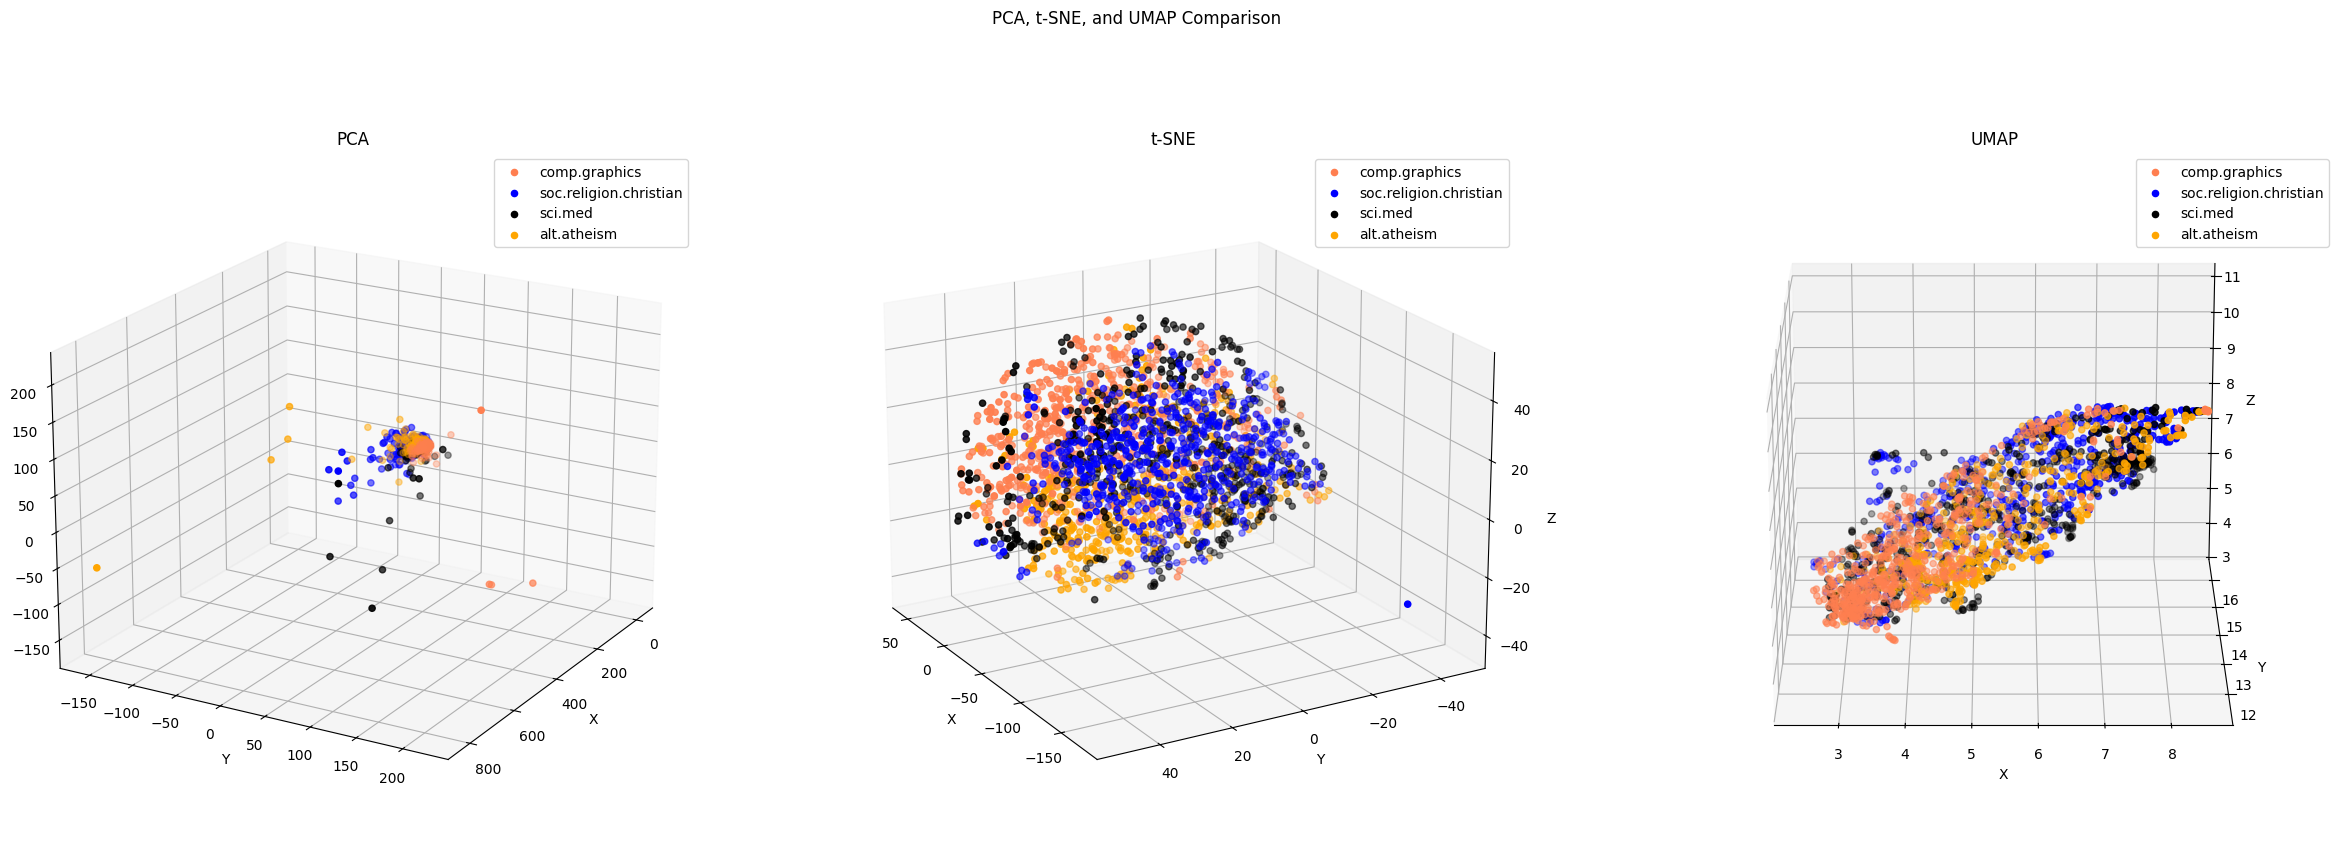

In [103]:
# Answer here
X_pca_aug = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=3).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

# Prepare for 3D plotting
col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique() 

# Create subplots for PCA, t-SNE, and UMAP
fig = plt.figure(figsize=(30, 10))
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a 3D scatter plot for each method
def plot_3d_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category][:, 0]
        ys = X_reduced[X['category_name'] == category][:, 1]
        zs = X_reduced[X['category_name'] == category][:, 2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)

    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right')

# Create 3D scatter plots for PCA, t-SNE, and UMAP
ax1 = fig.add_subplot(131, projection='3d')
plot_3d_scatter(ax1, X_pca_aug, 'PCA')

ax2 = fig.add_subplot(132, projection='3d')
plot_3d_scatter(ax2, X_tsne_aug, 't-SNE')

ax3 = fig.add_subplot(133, projection='3d')
plot_3d_scatter(ax3, X_umap_aug, 'UMAP')

# Set different viewing angles
ax1.view_init(elev=20, azim=30)  # PCA
ax2.view_init(elev=20, azim=150)  # t-SNE
ax3.view_init(elev=20, azim=270)  # UMAP

plt.show()
#In this case,  PCA samely doesn't change much.Interesting;y,the t-SNE graph become more condense and stiil mix up together.
#However,The UMAP visualization shows a curve surface relationship between these datasets

### >>> **Exercise 19 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [104]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)

LabelBinarizer()

In [105]:
X['bin_category'] = mlb.transform(X['category']).tolist()

In [106]:
# Answer here
X['bin_category'] = mlb.transform(X['category_name']).tolist()
X[0:20]
# NO, it doesn't work

text  category  \
0   From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1   From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2   From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3   From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4   From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5   From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6   From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7   From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8   From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
9   From: libman@hsc.usc.edu (Marlena Libman) Subj...         2   
10  From: anasaz!karl@anasazi.com (Karl Dussik) Su...         3   
11  From: amjad@eng.umd.edu (Amjad A Soomro) Subje...         1   
12  From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...         0   
13  Subject: So what is Maddi? From: madhaus@netco...         0   
14  From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...         1   
15  From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...         1   
16  From: texx@ossi.com (Robert "Texx" Woodworth) ...         2   
17  Organization: Penn State University From: <JSN...         0   
18  From: tom_milligan@rainbow.mentorg.com Subject...         3   
19  Subject: Re: Don't more innocents die without ...         0   

             category_name                                     tokenized_text  \
0            comp.graphics  {Please, Fax:, Organization:, application/PD, ...   
1            comp.graphics  {for, wholly, Organization:, segments., ani@ms...   
2   soc.religion.christian  {tolerated,, went, are, realize, tend, who, I'...   
3   soc.religion.christian  {Thanx,, for, church-state(government)., Zwart...   
4   soc.religion.christian  {Columbia, for, therefore, "clothes, righteous...   
5   soc.religion.christian  {perceived, that, human, Organization:, Witnes...   
6   soc.religion.christian  {Please, Joe, for, Indiana, that, anger, dealt...   
7                  sci.med  {pimples, counter., Getting, are, On-line, who...   
8                  sci.med  {types, that, Organization:, cones,, >blue-yel...   
9                  sci.med  {(Marlena, him,, quick., for, her, status., th...   
10  soc.religion.christian  {trust?, Az, me)., human, central, christianit...   
11           comp.graphics  {for, that, Also,, monitor?, Organization:, em...   
12             alt.atheism  {Imagine, another, >I'm, are, Or, pet, unicorn...   
13             alt.atheism  {for, therefore, which, road, that, So, don't,...   
14           comp.graphics  {for, 8, Organization:, drastically, from, scr...   
15           comp.graphics  {phone, Columbia,, another, Organization:, the...   
16                 sci.med  {Organization:, Recently, facts., news, he's, ...   
17             alt.atheism  {HELL!!!, YOUR, State, IN, HELL, Organization:...   
18  soc.religion.christian  {net-land, am, Anyone, affected, Tom, time, Or...   
19             alt.atheism  {suppose.), for, another, Organization:, (Jame...   

    bin_category  
0   [0, 0, 0, 0]  
1   [0, 0, 0, 0]  
2   [0, 0, 0, 0]  
3   [0, 0, 0, 0]  
4   [0, 0, 0, 0]  
5   [0, 0, 0, 0]  
6   [0, 0, 0, 0]  
7   [0, 0, 0, 0]  
8   [0, 0, 0, 0]  
9   [0, 0, 0, 0]  
10  [0, 0, 0, 0]  
11  [0, 0, 0, 0]  
12  [0, 0, 0, 0]  
13  [0, 0, 0, 0]  
14  [0, 0, 0, 0]  
15  [0, 0, 0, 0]  
16  [0, 0, 0, 0]  
17  [0, 0, 0, 0]  
18  [0, 0, 0, 0]  
19  [0, 0, 0, 0]

# Part2&3-work on new dataset

In [1]:
# import data
import pandas as pd
data = pd.read_csv('C:/Users/HARRY JUAN/Desktop/DMLab1/DM2024-Lab1-Master/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv')

print(data.head(20))

        sentiment                                            comment
0   not nostalgia  He was a singer with a golden voice that I lov...
1       nostalgia  The mist beautiful voice ever I listened to hi...
2       nostalgia  I have most of Mr. Reeves songs.  Always love ...
3   not nostalgia  30 day leave from 1st tour in Viet Nam to conv...
4       nostalgia  listening to his songs reminds me of my mum wh...
5       nostalgia  Every time I heard this song as a child, I use...
6       nostalgia  My dad loved listening to Jim Reeves, when I w...
7       nostalgia  i HAVE ALSO LISTENED TO Jim Reeves since child...
8   not nostalgia           Wherever you  are you always in my heart
9   not nostalgia  Elvis will always be number one no one can com...
10  not nostalgia  ill bet if they begin to play this song on the...
11      nostalgia  this song came out my senior year in high scho...
12      nostalgia  A few years back picked up at a charity shop a...
13      nostalgia  I am 47 and gre

In [2]:
# convert my data into dataframe
X = df = pd.DataFrame(data)
X

sentiment                                            comment
0     not nostalgia  He was a singer with a golden voice that I lov...
1         nostalgia  The mist beautiful voice ever I listened to hi...
2         nostalgia  I have most of Mr. Reeves songs.  Always love ...
3     not nostalgia  30 day leave from 1st tour in Viet Nam to conv...
4         nostalgia  listening to his songs reminds me of my mum wh...
...             ...                                                ...
1495  not nostalgia  i don't know!..but the opening of the video,.....
1496  not nostalgia  it's sad this is such a beautiful song when yo...
1497  not nostalgia  Dear Friend, I think age and time is not that ...
1498      nostalgia  I was born in 1954 and started to be aware of ...
1499      nostalgia  This is the first CD I bought after my marriag...

[1500 rows x 2 columns]

In [3]:
# check missing values
import helpers.data_mining_helpers as dmh
X.isnull().apply(lambda x: dmh.check_missing_values(x))

sentiment                             comment
0  The amoung of missing records is:   The amoung of missing records is: 
1                                   0                                   0

In [4]:
# check duplicated data, and it looks like we find one.
sum(X.duplicated())

1

In [5]:
# clean the data
X.drop_duplicates(keep=False, inplace=True) 
len(X)

1498

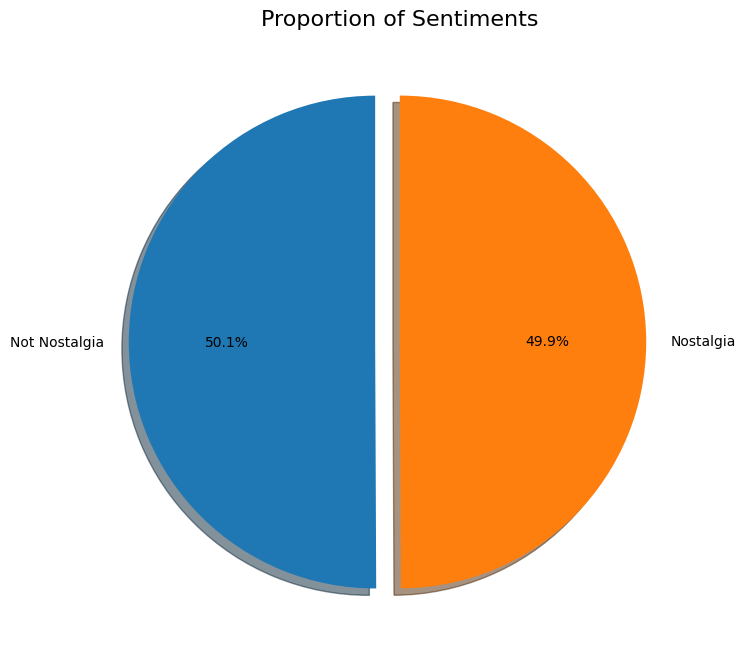

In [12]:
plt.figure(figsize=(8, 8))
df['sentiment'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=['#1f77b4', '#ff7f0e'],
    labels=['Not Nostalgia', 'Nostalgia'],
    explode=[0.1, 0],
    shadow=True
)
plt.title('Proportion of Sentiments', fontsize=16)
plt.ylabel('')  # Hide y-axis label
plt.show()

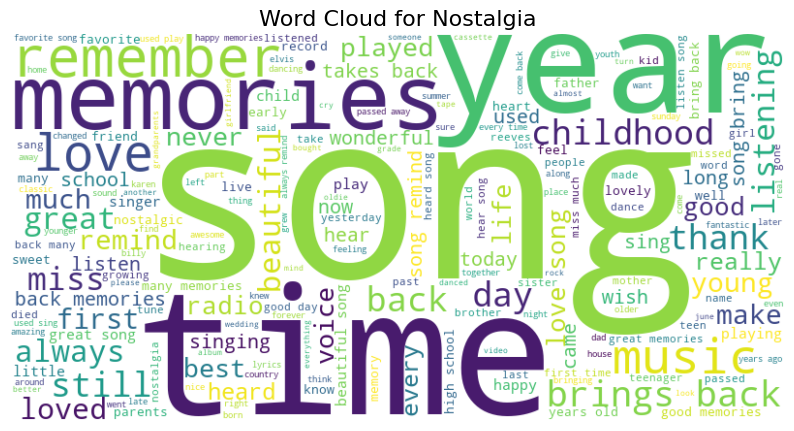

Top words in 'Word Cloud for Nostalgia':
song: 330
back: 247
memories: 145
love: 132
years: 126
remember: 124
time: 106
great: 101
brings: 97
music: 83


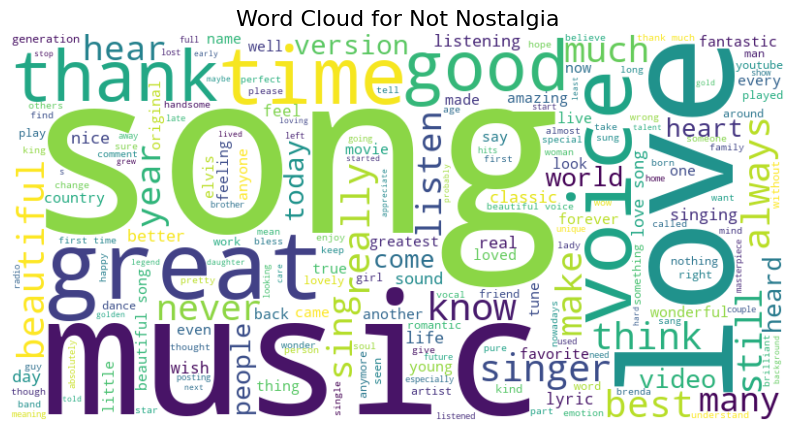

Top words in 'Word Cloud for Not Nostalgia':
song: 213
love: 154
music: 124
like: 111
great: 92
beautiful: 75
songs: 66
always: 56
time: 55
know: 54


In [13]:
from collections import Counter

def generate_wordcloud_with_stats(data, title):
    # Preprocess text and remove stopwords to extract meaningful content
    text = ' '.join(data).lower()
    words = [word for word in text.split() if word not in stop_words and len(word) > 3]
    
    # Generate Word Cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.show()
    
    # Top 10 Words (Additional Insights)
    word_counts = Counter(words).most_common(10)
    print(f"Top words in '{title}':")
    for word, count in word_counts:
        print(f"{word}: {count}")

# Generate word clouds and print top words
generate_wordcloud_with_stats(df[df['sentiment'] == 'nostalgia']['comment'], 'Word Cloud for Nostalgia')
generate_wordcloud_with_stats(df[df['sentiment'] == 'not nostalgia']['comment'], 'Word Cloud for Not Nostalgia')



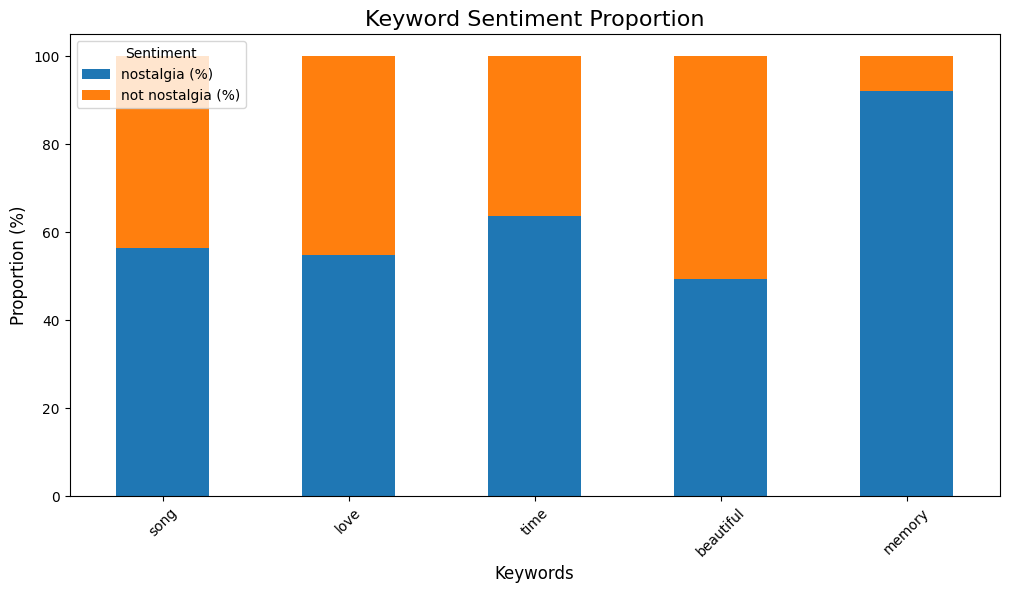

In [16]:
def keyword_sentiment_proportion(data, keywords):
    proportions = {keyword: {'nostalgia': 0, 'not nostalgia': 0} for keyword in keywords}
    for _, row in data.iterrows():
        comment = row['comment'].lower()
        sentiment = row['sentiment']
        for keyword in keywords:
            if keyword in comment:
                proportions[keyword][sentiment] += 1

    # Convert to DataFrame
    keyword_df = pd.DataFrame(proportions).T
    keyword_df['total'] = keyword_df['nostalgia'] + keyword_df['not nostalgia']
    keyword_df = keyword_df.sort_values(by='total', ascending=False)

    # Normalize for proportion
    keyword_df['nostalgia (%)'] = (keyword_df['nostalgia'] / keyword_df['total']) * 100
    keyword_df['not nostalgia (%)'] = (keyword_df['not nostalgia'] / keyword_df['total']) * 100

    # Plot
    keyword_df[['nostalgia (%)', 'not nostalgia (%)']].plot(
        kind='bar', stacked=True, figsize=(12, 6), color=['#1f77b4', '#ff7f0e']
    )
    plt.title('Keyword Sentiment Proportion', fontsize=16)
    plt.xlabel('Keywords', fontsize=12)
    plt.ylabel('Proportion (%)', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title='Sentiment')
    plt.show()

keywords = ['love', 'memory', 'beautiful', 'time', 'song']
keyword_sentiment_proportion(df, keywords)
# keywords like beautiful, time and memory might serve as strong indicators of the "nostalgia" sentiment.

### **Try to do some preprocessing and look for features**

In [8]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\HARRY
[nltk_data]     JUAN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
# takes a like a minute or two to process
X['unigrams'] = X['comment'].apply(lambda x: dmh.tokenize_text(x)) #將文本分割成離散單元

In [10]:
X[0:4]

sentiment                                            comment  \
0  not nostalgia  He was a singer with a golden voice that I lov...   
1      nostalgia  The mist beautiful voice ever I listened to hi...   
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...   
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   

                                            unigrams  
0  [He, was, a, singer, with, a, golden, voice, t...  
1  [The, mist, beautiful, voice, ever, I, listene...  
2  [I, have, most, of, Mr., Reeves, songs, ., Alw...  
3  [30, day, leave, from, 1st, tour, in, Viet, Na...

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.comment) #learn the vocabulary and return document-term matrix
print(X_counts[0])

  (0, 1598)	1
  (0, 3570)	2
  (0, 2973)	1
  (0, 3650)	1
  (0, 1470)	1
  (0, 3534)	1
  (0, 3282)	1
  (0, 2028)	1
  (0, 3336)	1
  (0, 1606)	1
  (0, 233)	2
  (0, 3284)	3
  (0, 3328)	2
  (0, 1651)	2
  (0, 1512)	1
  (0, 1249)	1
  (0, 323)	1
  (0, 214)	1
  (0, 2341)	1
  (0, 15)	1
  (0, 1733)	1
  (0, 3304)	1
  (0, 907)	1
  (0, 258)	2
  (0, 3124)	1
  (0, 2328)	2
  (0, 245)	1
  (0, 3581)	1
  (0, 1591)	1
  (0, 2082)	1
  (0, 2974)	1
  (0, 573)	1
  (0, 593)	1
  (0, 3538)	1
  (0, 1347)	2
  (0, 1833)	1
  (0, 2671)	1
  (0, 3713)	2
  (0, 1272)	1
  (0, 2688)	1
  (0, 1125)	1
  (0, 2035)	1
  (0, 3278)	1
  (0, 2018)	1
  (0, 1964)	1


In [12]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

In [13]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

In [14]:
plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

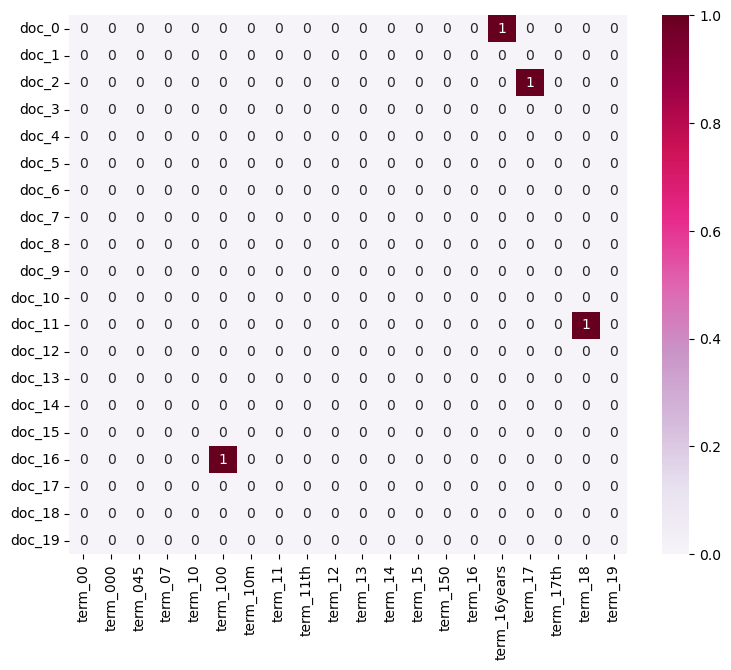

In [15]:
#try to visualize it in a heatmap, but sorry, it's hard and mine anything in this visualization
import seaborn as sns
import matplotlib.pyplot as plt #the orginal code didn't provide this line

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [16]:
import numpy as np
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [17]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

C:\Users\HARRY JUAN\AppData\Local\Temp\ipykernel_9676\2541221474.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


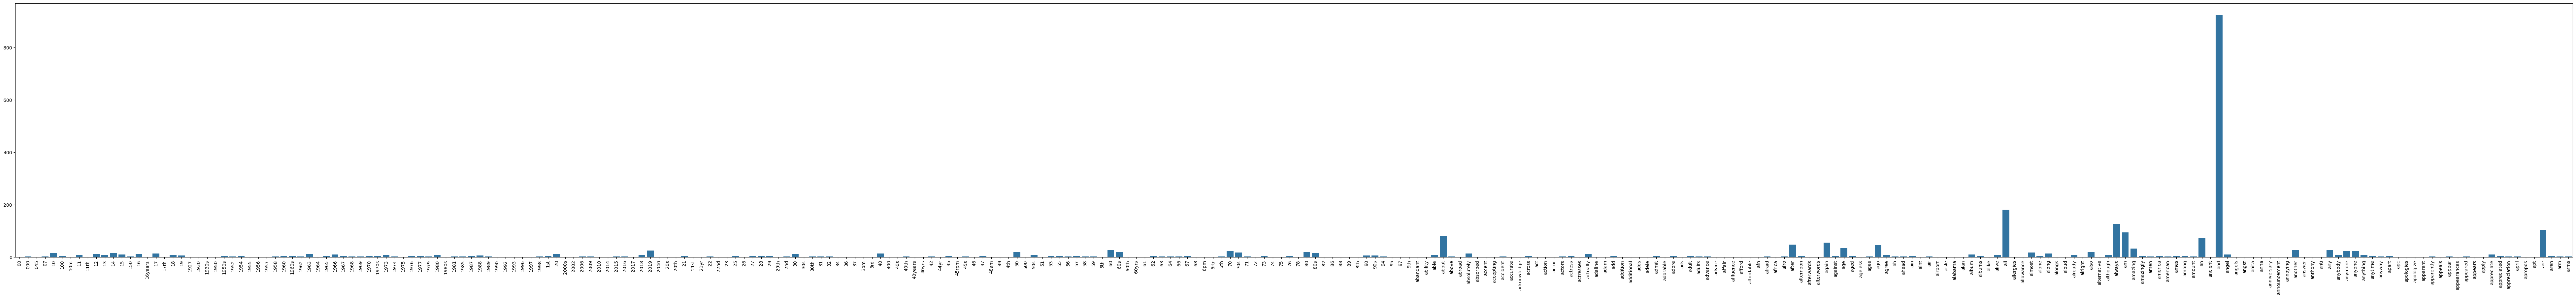

In [18]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

I try to visualize it in bar graph and heatmap to look for something, but it won't go, then i come up with that i can use a more ordinal presentation as below

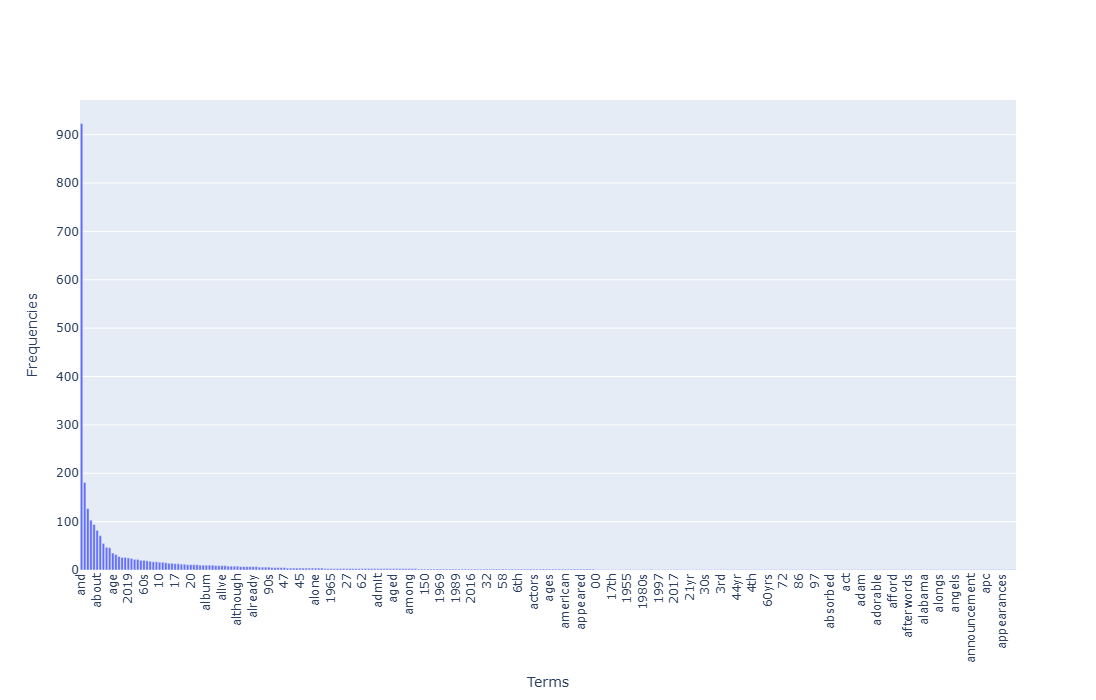

In [19]:
# to observe long tail distribution
import plotly.graph_objects as go

# Get terms and their frequencies
terms = count_vect.get_feature_names_out()[:300]
frequencies = term_frequencies[:300]

# Combine terms and frequencies into a list of tuples and sort by frequency in descending order
sorted_terms_frequencies = sorted(zip(terms, frequencies), key=lambda x: x[1], reverse=True)

# Unzip the sorted list into two separate lists
sorted_terms, sorted_frequencies = zip(*sorted_terms_frequencies)

# Create a bar chart using Plotly
fig = go.Figure(data=[
    go.Bar(x=sorted_terms, y=sorted_frequencies)
])
# Update the layout for custom figure size and rotate x-tick labels
fig.update_layout(width=1400, height=700, xaxis_tickangle=-90, xaxis_title="Terms", yaxis_title="Frequencies", showlegend=False)
fig.show()

As shown in the above graph, I get to know that the term 'and' 'all' 'always' are the top 3 frequent words appearing in the comments.

### **Next, I'll try to gernerative some term-frequency inverse document frequency features**

Generate TF-IDF features from the tokens of each text. This will generating a document matrix

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Sample dataset (use your actual dataset instead)
# Assuming 'comment' is the column containing text data
comments = X['comment'].values

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_features=1000,  # Limit to top 1000 tokens based on importance
    stop_words='english',  # Remove common stopwords
    ngram_range=(1, 1)  # Use unigrams (single words)
)

# Fit and transform the text data
tfidf_matrix = tfidf_vectorizer.fit_transform(comments)

# Convert TF-IDF matrix to a DataFrame for better interpretability
tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=tfidf_vectorizer.get_feature_names_out()
)

# Display the shape of the resulting matrix and a preview
print(f"TF-IDF Matrix Shape: {tfidf_df.shape}")
print(tfidf_df.head(10))


TF-IDF Matrix Shape: (1498, 1000)
    10  100   11   12   13   14   15   16        17   18  ...  yeah  year  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...   0.0   0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...   0.0   0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.183991  0.0  ...   0.0   0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...   0.0   0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...   0.0   0.0   
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...   0.0   0.0   
6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...   0.0   0.0   
7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...   0.0   0.0   
8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...   0.0   0.0   
9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...   0.0   0.0   

      years  yes  yesterday  young  younger  youth  youtube  yrs  
0  0.000000  0.0        0.0    0.0      0.0    0.0 

Next,i try to implement a simple Naive Bayes classifier that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers

### **Multinomial naive bayes classifier on TF-IDF**

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Assuming 'sentiment' is your target variable
# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tfidf_df, X['sentiment'], test_size=0.3, random_state=42)

# Train a Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8422222222222222
Classification Report:
               precision    recall  f1-score   support

    nostalgia       0.79      0.93      0.86       225
not nostalgia       0.92      0.75      0.83       225

     accuracy                           0.84       450
    macro avg       0.85      0.84      0.84       450
 weighted avg       0.85      0.84      0.84       450



### **Multinomial naive bayes classifier on word frequency**

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Assuming 'count_vect' is already defined and is used to vectorize the comments
# Ensure that you are vectorizing the 'comment' column, not the 'sentiment'
X_tdm = count_vect.fit_transform(X['comment'])  # Vectorize the 'comment' text, not 'sentiment'

# Ensure 'X_tdm' (term-document matrix) and 'X['sentiment']' have the same number of rows
# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_tdm, X['sentiment'], test_size=0.3, random_state=42)

# Train a Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8422222222222222
Classification Report:
               precision    recall  f1-score   support

    nostalgia       0.79      0.93      0.85       225
not nostalgia       0.91      0.76      0.83       225

     accuracy                           0.84       450
    macro avg       0.85      0.84      0.84       450
 weighted avg       0.85      0.84      0.84       450



### **Bernoulli naive Bayes classifier on TF-IDF**

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, accuracy_score

# Assuming 'sentiment' is your target variable
# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tfidf_df, X['sentiment'], test_size=0.3, random_state=42)

# Train a Bernoulli Naive Bayes classifier
bnb_model = BernoulliNB()
bnb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = bnb_model.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8688888888888889
Classification Report:
               precision    recall  f1-score   support

    nostalgia       0.85      0.90      0.87       225
not nostalgia       0.89      0.84      0.86       225

     accuracy                           0.87       450
    macro avg       0.87      0.87      0.87       450
 weighted avg       0.87      0.87      0.87       450



### **Bernoulli naive Bayes classifier on word frequency**

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, accuracy_score

# Assuming 'count_vect' is already defined and is used to vectorize the comments
# Ensure that you are vectorizing the 'comment' column, not the 'sentiment'
X_tdm = count_vect.fit_transform(X['comment'])  # Vectorize the 'comment' text, not 'sentiment'

# Ensure 'X_tdm' (term-document matrix) and 'X['sentiment']' have the same number of rows
# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_tdm, X['sentiment'], test_size=0.3, random_state=42)

# Train a Naive Bayes classifier
nb_model = BernoulliNB()
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8733333333333333
Classification Report:
               precision    recall  f1-score   support

    nostalgia       0.84      0.92      0.88       225
not nostalgia       0.91      0.83      0.87       225

     accuracy                           0.87       450
    macro avg       0.88      0.87      0.87       450
 weighted avg       0.88      0.87      0.87       450



### **Conclusion**

Using multinomial naive Bayes classifier on either word frequency data or tfidf data has similar result(accuracy), it could mean that the dataset already contains distinctive words that separate the classes well, and the effect of down-weighting common words doesn't significantly alter the performance.As for using bernoulli naive Bayes classifier, the accuracy is generally better since we have binary data.
Using bernoulli naive Bayes(BNB) classifier, word frequency (with binary representation, like binarizing the word frequency data to convert counts into 1s and 0s) directly aligns with its characteristics.On the other hand, TF-IDF produces continuous values for each word, which may not work as well with BNB since BNB is optimized for binary data.

# Part4

The part of text Processing maybe inefficient, we can utilize NLP tools (e.g., SpaCy, NLTK, or HuggingFace) for accurate text processing without manually doing it.WE can also rely on word embedding models(e.g., Word2Vec, FastText, or BERT) to capture semantic information rather than rely solely on raw word frequencies.In terms of pattern finding,we can try more efficient mining algorithms, such as ECLAT or TopK-Frequent Pattern Growth, to reduce runtime and handle large datasets.

